# Práctica 1: Datos y exploración de datos
Duración: 1 sesión

Apartado 1.2: Exploración de datos

Realice los siguientes ejercicios usando el módulo Pandas y cualquier otro módulo adicional que considere.

El objetivo de la práctica es estudiar la información que se puede obtener de los diferentes métodos visuales de exploración de datos.
1. Obtenga entre 2 y 5 ejemplos de ficheros de datos en formato CSV, ARFF u otro cualquiera de:

- Weka datasets

- UCI MLR

Para cada uno de los ejercicios posteriores realice las operaciones de transformación previa de los datos que
estime oportunas.
2. Realice un box plots de los datasets. Indique qué información se puede obtener de los gráficos. En al menos un ejemplo construya el mismo gráfico por clases. ¿Se puede obtener información adicional para este caso?

3. Realice un scatter plot matricial de los datasets. Indique qué información se puede obtener de los gráficos.

4. Represente la matriz de correlación entre las variables usando un mapa de calor e indique la información que se puede extraer del gráfico.

5. Realice el mismo mapa de calor usando la correlación entre las instancias (esta operación es equivalente a realizar la correlación en la matriz de datos traspuesta). Indique qué información se puede obtener de los gráficos.

6. Repita los dos ejercicios anteriores separando en la gráfica las instancias por clases

7. Realice con al menos uno de los datasets un gráfico en coordenadas paralelas. Indique la información que se puede extraer del gráfico. Comprueba si la modificación del orden de las coordenadas ayuda a la comprensión
del gráfico.
---



In [24]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/ionosphere.arff
!wget https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/diabetes.arff
!wget https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/iris.arff
!wget https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/cpu.arff

--2024-02-09 20:19:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv.1’

winequality-red.csv     [ <=>                ]  82.23K  --.-KB/s    in 0.1s    

2024-02-09 20:19:45 (619 KB/s) - ‘winequality-red.csv.1’ saved [84199]

--2024-02-09 20:19:45--  https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/ionosphere.arff
Resolving storm.cis.fordham.edu (storm.cis.fordham.edu)... 150.108.68.26
Connecting to storm.cis.fordham.edu (storm.cis.fordham.edu)|150.108.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80385 (79K) [text/plain]
Saving to: ‘ionosphere.arff.1’

ionosphere.arff.1   100%[===================>]  78.50K  --.-KB/s    in 0.02s   

2024-02-

In [25]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('cpu.arff')
df_cpu = pd.DataFrame(data[0])

df_wine = pd.read_csv('winequality-red.csv', sep=";")

In [26]:
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'
4,5.0,3.6,1.4,0.2,b'Iris-setosa'


<Axes: title={'center': 'petallength'}, xlabel='class'>

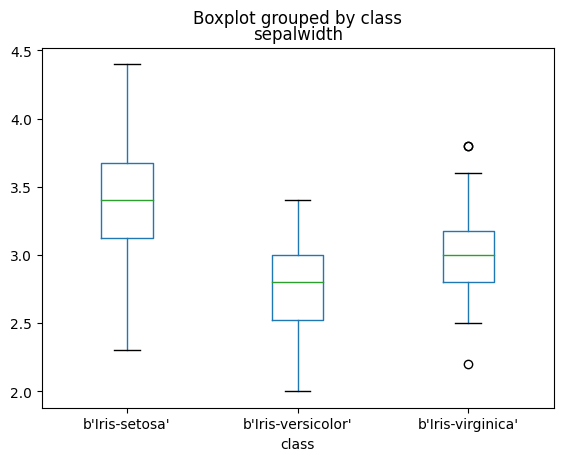

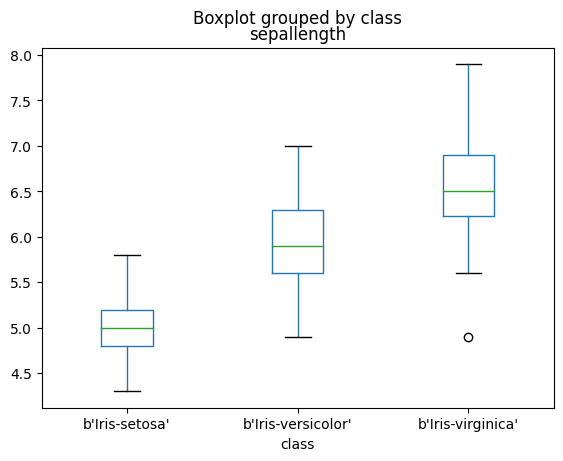

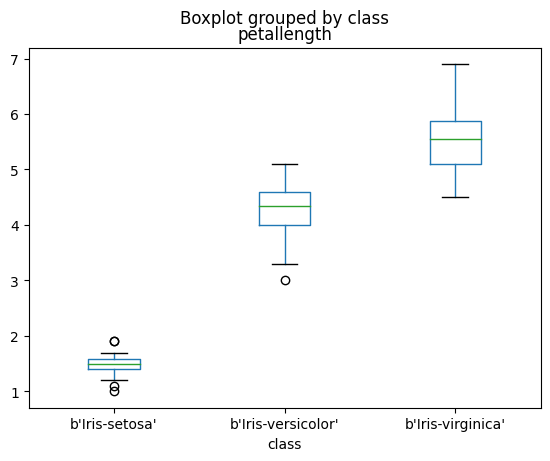

In [27]:
df_iris.boxplot(by='class', column=['sepalwidth'], grid=False)

df_iris.boxplot(by='class', column=['sepallength'], grid=False)

df_iris.boxplot(by='class', column=['petallength'], grid=False)

In [28]:
from sklearn import preprocessing

def standardize(df: pd.DataFrame):
    res = df.copy()
    scaler = preprocessing.StandardScaler()

    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    return res

def normalize(df: pd.DataFrame):
    res = df.copy()
    scaler = preprocessing.MinMaxScaler()

    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    return res

<Axes: title={'center': 'petallength'}, xlabel='class'>

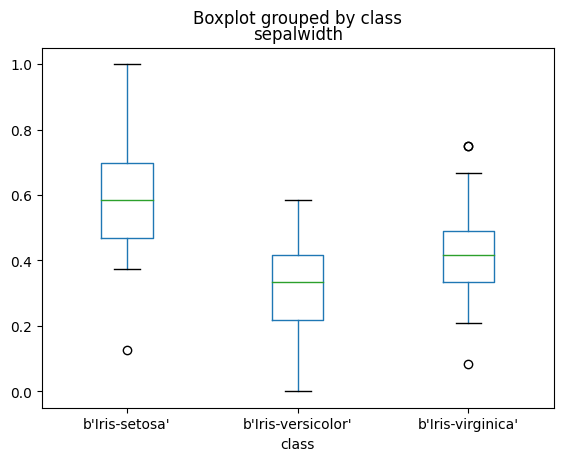

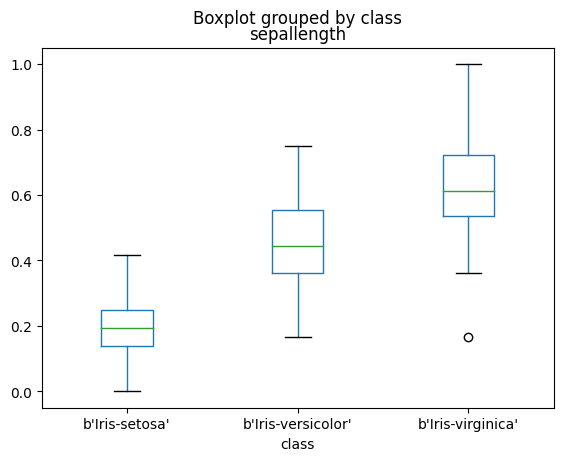

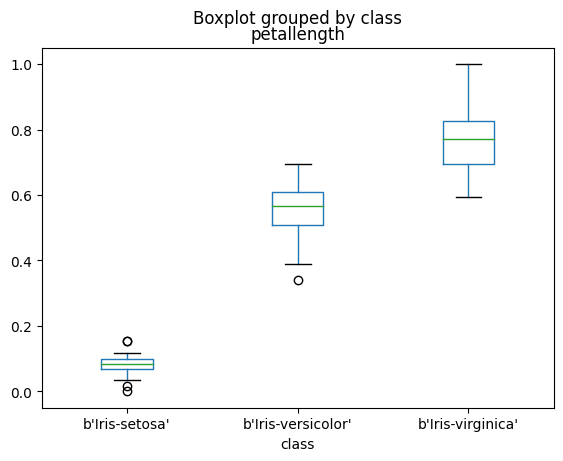

In [29]:
df_iris = standardize(df_iris)
df_iris = normalize(df_iris)

df_iris.head()

df_iris.boxplot(by='class', column=['sepalwidth'], grid=False)

df_iris.boxplot(by='class', column=['sepallength'], grid=False)

df_iris.boxplot(by='class', column=['petallength'], grid=False)

<Axes: title={'center': 'sepalwidth'}, xlabel='sepallength'>

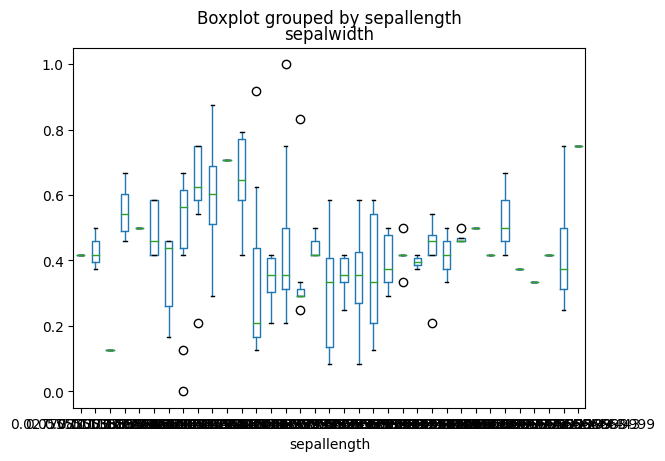

In [30]:
df_iris = standardize(df_iris)
df_iris = normalize(df_iris)

df_iris.boxplot(by='sepallength', column=['sepalwidth'], grid=False)

In [31]:
df_diabe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


<Axes: title={'center': 'insu'}, xlabel='class'>

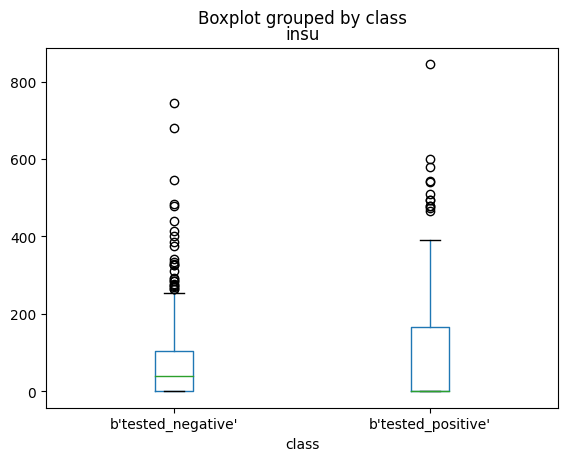

In [32]:
#df_diabe = standardize(df_diabe)
#df_diabe = normalize(df_diabe)

df_diabe.boxplot(by='class', column=['insu'], grid=False)

<Axes: title={'center': 'petallength'}, xlabel='petalwidth'>

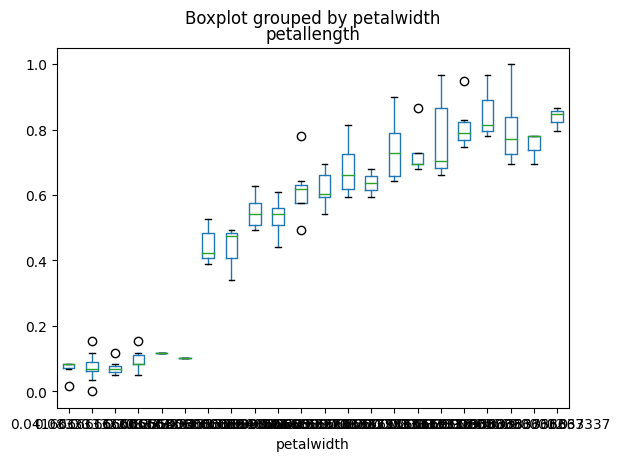

In [33]:
df_iris = standardize(df_iris)
df_iris = normalize(df_iris)

df_iris.head()

df_iris.boxplot(by='petalwidth', column=['petallength'], grid=False)

In [34]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
df_wine = standardize(df_wine)
df_wine = normalize(df_wine)

<Axes: title={'center': 'pH'}, xlabel='quality'>

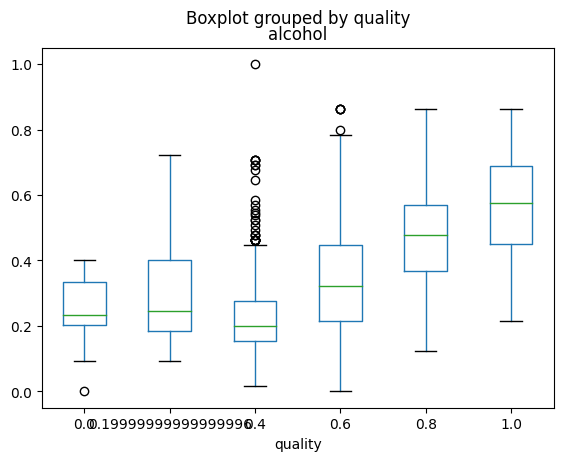

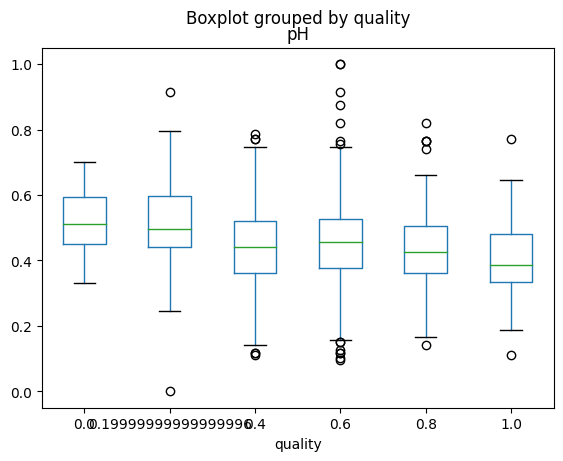

In [36]:
df_wine.boxplot(by='quality', column=['alcohol'], grid=False)
df_wine.boxplot(by='quality', column=['pH'], grid=False)

In [37]:
import plotly.express as px

df = df_iris
fig = px.scatter_matrix(df,
    dimensions=["sepalwidth", "sepallength", "petalwidth", "petallength"],
    color="class")
fig.show()

In [38]:
df_diabe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


In [39]:
df = df_diabe
fig = px.scatter_matrix(df,
    dimensions=["insu", "mass", "age"],
    color="class")
fig.show()

In [40]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [41]:
df = df_wine
fig = px.scatter_matrix(df,
    dimensions=["alcohol", "pH", "citric acid"],
    color="quality")
fig.show()

<ipython-input-42-d9fe8a3f00e8>:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



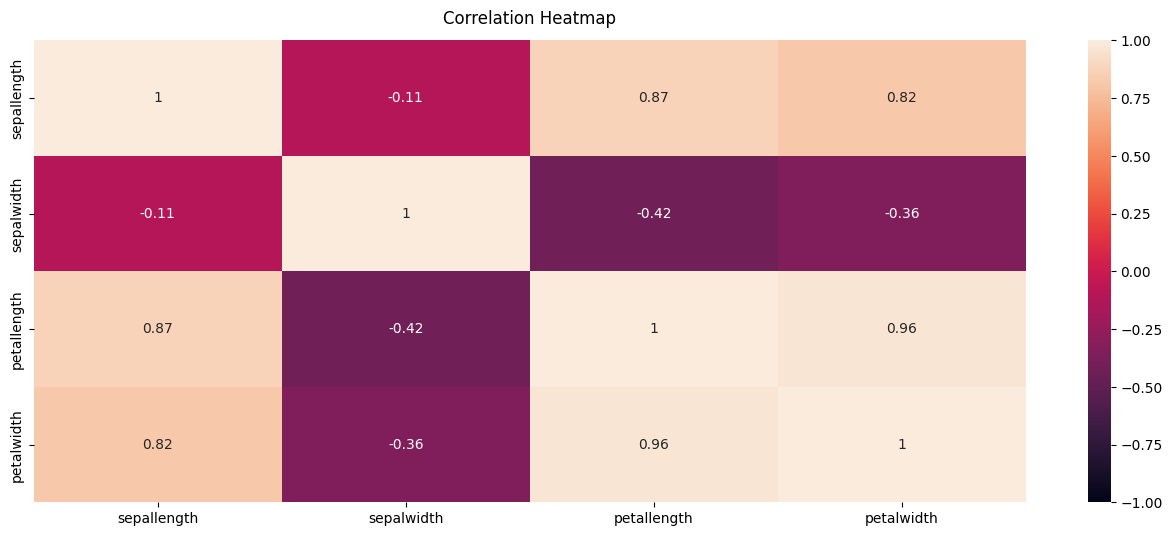

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = df_iris

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

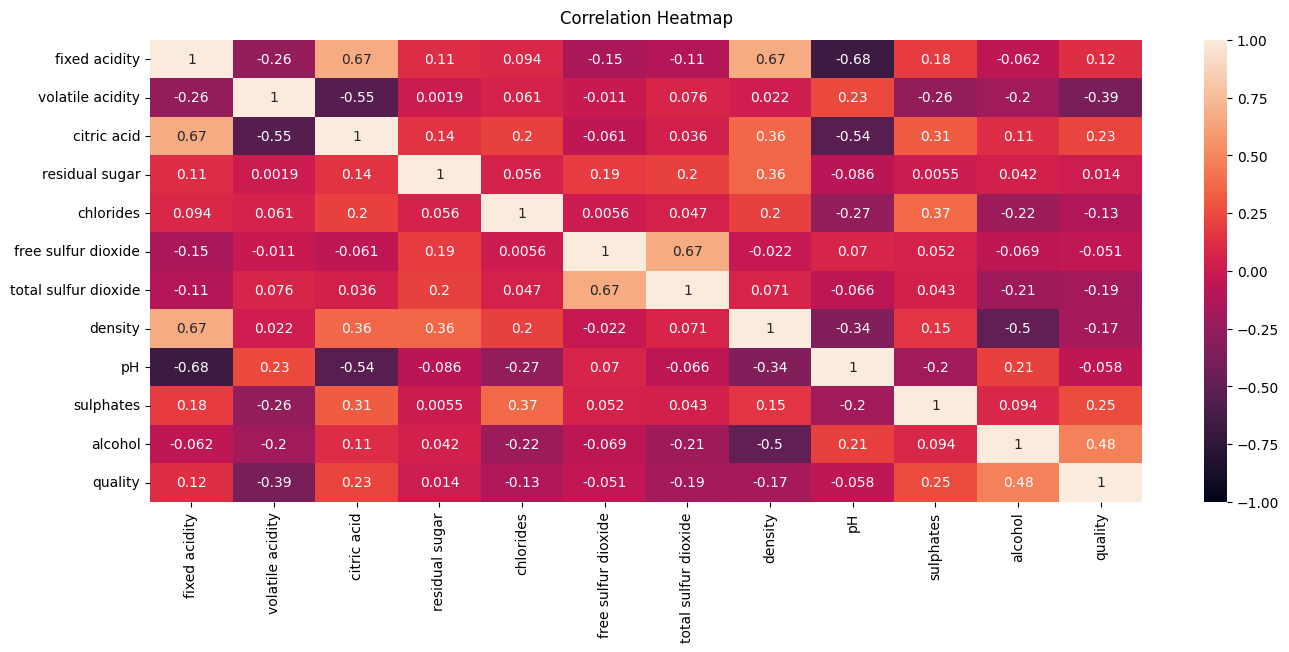

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = df_wine

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

   preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'


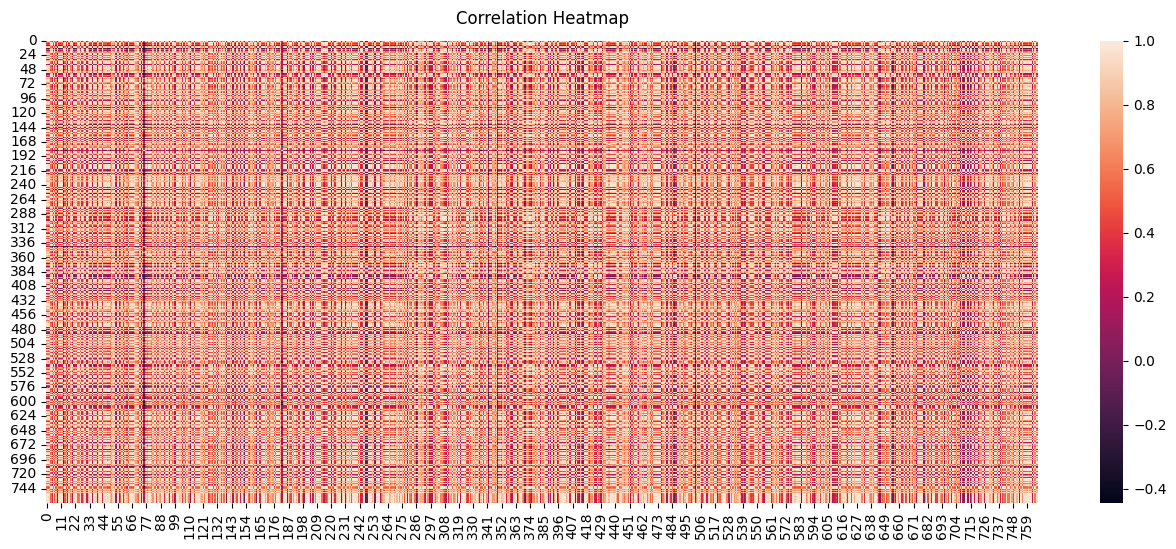

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = df_diabe

print(dataframe.head())

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.T.drop('class').astype('float').corr())
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

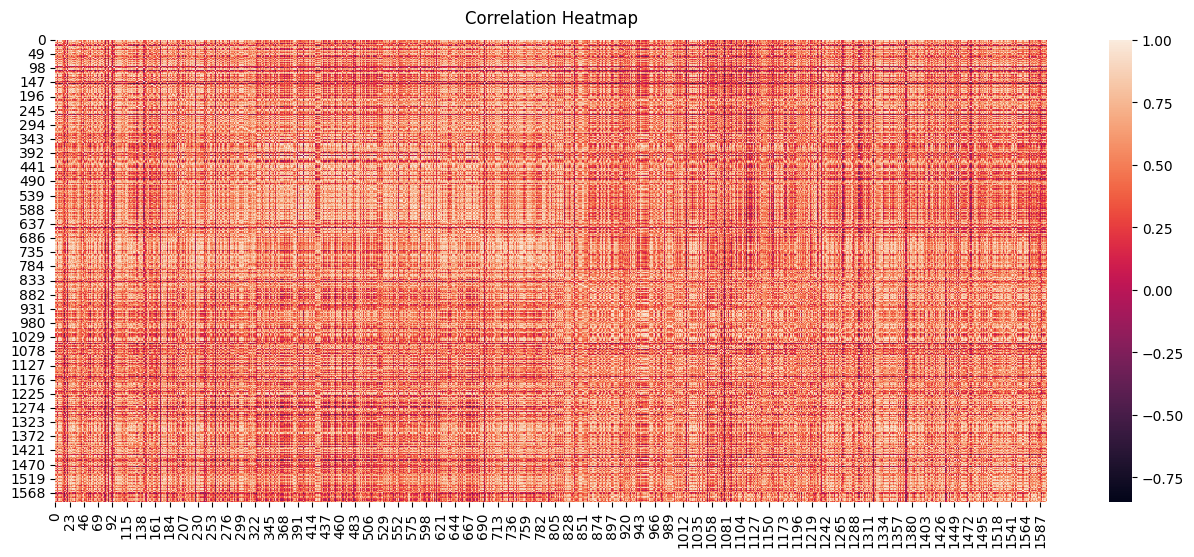

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = df_wine

print(dataframe.head())

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.T.drop('quality').astype('float').corr())
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);